In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader

import os

base_dir = os.getcwd() 
file_path = os.path.join(base_dir, "..", "CorrectionDispersion", "dataset", "nps_simulated_dataset_gaussiano_2025-08-12.csv")
dataset = pd.read_csv(file_path)
tsf= pd.read_csv(os.path.join(base_dir, "..", "CorrectionDispersion", "dataset", "nps_simulated_dataset_tsfresh_2025-08-12.csv"))

print("Number of rows: ", dataset.shape[0])
print("Number of columns: ", dataset.shape[1])
print(dataset.info())
dataset.head(20)

Number of rows:  1000
Number of columns:  22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   simulation_id       1000 non-null   int64  
 1   sensor_id           1000 non-null   int64  
 2   sensor_x            1000 non-null   float64
 3   sensor_y            1000 non-null   float64
 4   sensor_noise        1000 non-null   float64
 5   sensor_height       1000 non-null   float64
 6   sensor_is_fault     1000 non-null   bool   
 7   days                1000 non-null   int64  
 8   RH                  1000 non-null   float64
 9   humidify            1000 non-null   bool   
 10  days_simulation     1000 non-null   int64  
 11  wind_type           1000 non-null   object 
 12  wind_speed          1000 non-null   float64
 13  wind_dir            1000 non-null   object 
 14  stability_profile   1000 non-null   object 
 15  stability_v

,simulation_id,sensor_id,sensor_x,sensor_y,sensor_noise,sensor_height,sensor_is_fault,days,RH,humidify,...,wind_speed,wind_dir,stability_profile,stability_value,aerosol_type,source_x,source_y,source_h,emission_rate,real_concentration
0,0,0,121.0,18.0,0.0004,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
1,0,1,207.0,204.0,0.0005,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
2,0,2,105.0,0.0,0.0001,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
3,0,3,140.0,47.0,0.0002,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
4,0,4,371.0,481.0,0.0004,2.0,True,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
5,0,5,39.0,238.0,0.0003,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
6,0,6,243.0,353.0,0.0002,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
7,0,7,91.0,157.0,0.0002,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
8,0,8,268.0,148.0,0.0001,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
9,0,9,273.0,209.0,0.0002,2.0,False,10,0.21,True,...,1.98,"297.50684357286747,191.49732006379136,53.45049...",CONSTANT,PasquillGiffordStability.VERY_STABLE,PIPERAZINE_ANALOGUES,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy


In [187]:
print("Number of rows: ", tsf.shape[0])
print("Number of columns: ", tsf.shape[1])
print(tsf.info())
tsf.head(20)

Number of rows:  185280
Number of columns:  8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185280 entries, 0 to 185279
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   simulation_id  185280 non-null  int64  
 1   sensor_id      185280 non-null  int64  
 2   time           185280 non-null  float64
 3   conc           185280 non-null  float64
 4   wind_dir_x     185280 non-null  float64
 5   wind_dir_y     185280 non-null  float64
 6   wind_speed     185280 non-null  float64
 7   wind_type      185280 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 11.3 MB
None


,simulation_id,sensor_id,time,conc,wind_dir_x,wind_dir_y,wind_speed,wind_type
0,0,0,0.041667,2.863939e-10,0.461855,-0.886956,1.98,2
1,0,0,0.083333,0.000000e+00,-0.979934,-0.199322,1.98,2
2,0,0,0.125000,0.000000e+00,0.595517,0.803343,1.98,2
3,0,0,0.166667,0.000000e+00,-0.987262,-0.159104,1.98,2
4,0,0,0.208333,1.691768e-10,-0.879904,-0.475151,1.98,2
5,0,0,0.250000,0.000000e+00,0.832744,-0.553658,1.98,2
6,0,0,0.291667,3.198163e-10,-0.013049,-0.999915,1.98,2
7,0,0,0.333333,1.236331e-11,0.028243,-0.999601,1.98,2
8,0,0,0.375000,2.195897e-09,0.993757,-0.111565,1.98,2
9,0,0,0.416667,0.000000e+00,0.825323,0.564661,1.98,2


In [188]:
datset_copy= dataset.copy()

In [189]:
def convert_string_to_array(s):
    if isinstance(s, str):
        s = s.replace('[', '').replace(']', '')
        return np.fromstring(s, sep=',')
    return s

#datset_copy["contratio_series"] = datset_copy["contratio_series"].apply(convert_string_to_array) #type: ignore
datset_copy["wind_dir"] = datset_copy["wind_dir"].apply(convert_string_to_array) #type: ignore

In [190]:
datset_copy["wind_dir"]

0      [297.50684357286747, 191.49732006379136, 53.45...
1      [297.50684357286747, 191.49732006379136, 53.45...
2      [297.50684357286747, 191.49732006379136, 53.45...
3      [297.50684357286747, 191.49732006379136, 53.45...
4      [297.50684357286747, 191.49732006379136, 53.45...
                             ...                        
995    [19.24295130895386, 356.4341201335138, 357.108...
996    [19.24295130895386, 356.4341201335138, 357.108...
997    [19.24295130895386, 356.4341201335138, 357.108...
998    [19.24295130895386, 356.4341201335138, 357.108...
999    [19.24295130895386, 356.4341201335138, 357.108...
Name: wind_dir, Length: 1000, dtype: object

In [191]:
wind_type_map = {
    "CONSTANT": 1,
    "FLUCTUATING": 2,
    "PREVAILING": 3
}

pg_stability_map = {
    "PasquillGiffordStability.VERY_UNSTABLE": 1,
    "PasquillGiffordStability.MODERATELY_UNSTABLE": 2,
    "PasquillGiffordStability.SLIGHTLY_UNSTABLE": 3,
    "PasquillGiffordStability.NEUTRAL": 4,
    "PasquillGiffordStability.MODERATELY_STABLE": 5,
    "PasquillGiffordStability.VERY_STABLE": 6
}

nps_type_map = {
    "CANNABINOID_ANALOGUES": 0,
    "CATHINONE_ANALOGUES": 1,
    "PHENETHYLAMINE_ANALOGUES": 2,
    "PIPERAZINE_ANALOGUES": 3,
    "TRYPTAMINE_ANALOGUES": 4,
    "FENTANYL_ANALOGUES": 5,
    "OTHER_COMPOUNDS": 6
}


datset_copy['wind_type'] = datset_copy['wind_type'].astype(str)
datset_copy['stability_value'] = datset_copy['stability_value'].astype(str)
datset_copy['aerosol_type'] = datset_copy['aerosol_type'].astype(str)

datset_copy['wind_type'] = datset_copy['wind_type'].map(wind_type_map)
datset_copy['stability_value'] = datset_copy['stability_value'].map(pg_stability_map)
datset_copy['aerosol_type'] = datset_copy['aerosol_type'].map(nps_type_map)

datset_copy[["wind_type", "stability_value", "aerosol_type"]].head()

,wind_type,stability_value,aerosol_type
0,2,6,3
1,2,6,3
2,2,6,3
3,2,6,3
4,2,6,3


In [192]:
datset_copy.drop(columns=["humidify", "stability_profile", "sensor_height"], inplace=True)

In [193]:
datset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   simulation_id       1000 non-null   int64  
 1   sensor_id           1000 non-null   int64  
 2   sensor_x            1000 non-null   float64
 3   sensor_y            1000 non-null   float64
 4   sensor_noise        1000 non-null   float64
 5   sensor_is_fault     1000 non-null   bool   
 6   days                1000 non-null   int64  
 7   RH                  1000 non-null   float64
 8   days_simulation     1000 non-null   int64  
 9   wind_type           1000 non-null   int64  
 10  wind_speed          1000 non-null   float64
 11  wind_dir            1000 non-null   object 
 12  stability_value     1000 non-null   int64  
 13  aerosol_type        1000 non-null   int64  
 14  source_x            1000 non-null   float64
 15  source_y            1000 non-null   float64
 16  source_

In [194]:
real_contration= datset_copy['real_concentration']
#datset_copy.drop(columns=["real_concentration"], inplace=True)

In [195]:
datset_copy.head()

,simulation_id,sensor_id,sensor_x,sensor_y,sensor_noise,sensor_is_fault,days,RH,days_simulation,wind_type,wind_speed,wind_dir,stability_value,aerosol_type,source_x,source_y,source_h,emission_rate,real_concentration
0,0,0,121.0,18.0,0.0004,False,10,0.21,10,2,1.98,"[297.50684357286747, 191.49732006379136, 53.45...",6,3,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
1,0,1,207.0,204.0,0.0005,False,10,0.21,10,2,1.98,"[297.50684357286747, 191.49732006379136, 53.45...",6,3,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
2,0,2,105.0,0.0,0.0001,False,10,0.21,10,2,1.98,"[297.50684357286747, 191.49732006379136, 53.45...",6,3,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
3,0,3,140.0,47.0,0.0002,False,10,0.21,10,2,1.98,"[297.50684357286747, 191.49732006379136, 53.45...",6,3,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy
4,0,4,371.0,481.0,0.0004,True,10,0.21,10,2,1.98,"[297.50684357286747, 191.49732006379136, 53.45...",6,3,23.0,213.0,7.98,0.0044,sim_0_conc_real_2025-08-12.npy


In [196]:
datset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   simulation_id       1000 non-null   int64  
 1   sensor_id           1000 non-null   int64  
 2   sensor_x            1000 non-null   float64
 3   sensor_y            1000 non-null   float64
 4   sensor_noise        1000 non-null   float64
 5   sensor_is_fault     1000 non-null   bool   
 6   days                1000 non-null   int64  
 7   RH                  1000 non-null   float64
 8   days_simulation     1000 non-null   int64  
 9   wind_type           1000 non-null   int64  
 10  wind_speed          1000 non-null   float64
 11  wind_dir            1000 non-null   object 
 12  stability_value     1000 non-null   int64  
 13  aerosol_type        1000 non-null   int64  
 14  source_x            1000 non-null   float64
 15  source_y            1000 non-null   float64
 16  source_

In [197]:
#tsf["series_id"] = tsf["simulation_id"].astype(str) + "_" + tsf["sensor_id"].astype(str)
#tsf.head()

In [198]:
#tsf.drop(columns=["sensor_id", "simulation_id"], inplace=True)
#tsf.head()

In [199]:
grouped = tsf.groupby("simulation_id")

In [200]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

def estrai_feature(time, conc, window=None, spike_height=None):
    """
    Calcola feature principali da una serie temporale concentrazione-tempo.
    
    Parametri:
    ----------
    time : array-like
        Vettore dei tempi (es. in ore o secondi)
    conc : array-like
        Vettore delle concentrazioni misurate
    window : tuple (t_start, t_end), opzionale
        Finestra temporale su cui calcolare media (default: tutta la serie)
    spike_height : float, opzionale
        Soglia minima per riconoscere picchi (default: 10% del massimo)
        
    Ritorna:
    --------
    dict con feature calcolate
    """

    time = np.array(time)
    conc = np.array(conc)

    # Concentrazione massima e tempo del massimo
    C_max = np.max(conc)
    idx_max = np.argmax(conc)
    t_peak = time[idx_max]

    # Primo picco
    if spike_height is None:
        spike_height = 0.1 * C_max  # soglia 10% del massimo
    peaks, _ = find_peaks(conc, height=spike_height)

    if len(peaks) > 0:
        t_first_peak = time[peaks[0]]
    else:
        t_first_peak = np.nan

    # Media e deviazione standard su finestra
    if window is not None:
        mask = (time >= window[0]) & (time <= window[1])
        conc_window = conc[mask]
    else:
        conc_window = conc
    mean_val = np.mean(conc_window)
    std_val = np.std(conc_window)

    # Area sotto la curva 
    auc = np.trapz(conc, time)

    # Durata plume = tempo tra primo e ultimo superamento soglia
    above = np.where(conc > spike_height)[0]
    if len(above) > 0:
        t_plume_start = time[above[0]]
        t_plume_end = time[above[-1]]
        plume_duration = t_plume_end - t_plume_start
    else:
        plume_duration = 0.0

    # Frequenza degli spike
    spike_count = len(peaks)
    total_duration = time[-1] - time[0]
    if total_duration > 0:
        spike_freq = spike_count / total_duration
    else:
        spike_freq = 0.0

    return {
        "C_max": C_max,
        "t_peak": t_peak,
        "t_first_peak": t_first_peak,
        "mean": mean_val,
        "std": std_val,
        "AUC": auc,
        "plume_duration": plume_duration,
        "spike_count": spike_count,
        "spike_frequency": spike_freq
    }

agg_features_list = []

for sim, group in grouped:
    print(f"Features for series_id: {sim}")

    sensori = group['sensor_id'].unique()
    sensori_features = []

    for s in sensori:
        sensor_data = group[group['sensor_id'] == s]
        features = estrai_feature(sensor_data['time'], sensor_data['conc'])
        sensori_features.append(features)

    # Trasforma in DataFrame per aggregazioneY
    df_features = pd.DataFrame(sensori_features)

    # Aggrega per simulazione: media e std dei sensori
    agg_features = df_features.mean().add_suffix('_mean').to_dict()
    agg_features.update(df_features.std().add_suffix('_std').to_dict())
    agg_features['series_id'] = sim
    agg_features["wind_dir_x"] = grouped.get_group(sim)["wind_dir_x"].iloc[0]
    agg_features["wind_dir_y"] = grouped.get_group(sim)["wind_dir_y"].iloc[0]
    agg_features["wind_speed"] = grouped.get_group(sim)["wind_speed"].iloc[0]
    agg_features["wind_type"] = grouped.get_group(sim)["wind_type"].iloc[0]
    agg_features_list.append(agg_features)

# DataFrame finale con una riga per simulazione
sim_feature = pd.DataFrame(agg_features_list)

Features for series_id: 0
Features for series_id: 1
Features for series_id: 2
Features for series_id: 3
Features for series_id: 4
Features for series_id: 5
Features for series_id: 6
Features for series_id: 7
Features for series_id: 8
Features for series_id: 9
Features for series_id: 10
Features for series_id: 11
Features for series_id: 12
Features for series_id: 13
Features for series_id: 14
Features for series_id: 15
Features for series_id: 16
Features for series_id: 17
Features for series_id: 18
Features for series_id: 19
Features for series_id: 20
Features for series_id: 21
Features for series_id: 22
Features for series_id: 23
Features for series_id: 24
Features for series_id: 25
Features for series_id: 26
Features for series_id: 27
Features for series_id: 28
Features for series_id: 29
Features for series_id: 30
Features for series_id: 31
Features for series_id: 32
Features for series_id: 33


C:\Users\claud\AppData\Local\Temp\ipykernel_22884\173671935.py:53: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(conc, time)


Features for series_id: 34
Features for series_id: 35
Features for series_id: 36
Features for series_id: 37
Features for series_id: 38
Features for series_id: 39
Features for series_id: 40
Features for series_id: 41
Features for series_id: 42
Features for series_id: 43
Features for series_id: 44
Features for series_id: 45
Features for series_id: 46
Features for series_id: 47
Features for series_id: 48
Features for series_id: 49
Features for series_id: 50
Features for series_id: 51
Features for series_id: 52
Features for series_id: 53
Features for series_id: 54
Features for series_id: 55
Features for series_id: 56
Features for series_id: 57
Features for series_id: 58
Features for series_id: 59
Features for series_id: 60
Features for series_id: 61
Features for series_id: 62
Features for series_id: 63
Features for series_id: 64
Features for series_id: 65
Features for series_id: 66
Features for series_id: 67
Features for series_id: 68
Features for series_id: 69
Features for series_id: 70
F

In [201]:
sim_feature.head()

,C_max_mean,t_peak_mean,t_first_peak_mean,mean_mean,std_mean,AUC_mean,plume_duration_mean,spike_count_mean,spike_frequency_mean,C_max_std,...,std_std,AUC_std,plume_duration_std,spike_count_std,spike_frequency_std,series_id,wind_dir_x,wind_dir_y,wind_speed,wind_type
0,1.751588e-06,4.777778,1.458333,2.276447e-08,1.679230e-07,2.276391e-07,7.000000,7.000000,0.702929,1.516526e-06,...,1.436253e-07,2.023520e-07,1.828948,3.570714,0.358565,0,0.461855,-0.886956,1.98,2
1,7.471331e-08,5.726190,0.327381,7.667201e-09,1.864737e-08,7.656029e-08,9.630952,39.142857,3.930663,1.256447e-07,...,3.036612e-08,1.183210e-07,0.287096,6.335839,0.636235,1,-0.968395,0.249420,4.48,2
2,2.374680e-07,6.937500,0.333333,2.649496e-08,6.161077e-08,2.648287e-07,9.611111,29.166667,2.928870,2.589843e-07,...,7.842458e-08,3.812564e-07,0.312546,7.111024,0.714078,2,-0.630977,0.775802,4.94,2
3,2.991292e-09,4.562500,0.184524,2.309635e-09,1.615556e-10,2.299874e-08,8.635417,55.250000,5.548117,6.049406e-09,...,1.015288e-10,6.172595e-08,3.490190,23.462736,2.356091,3,1.000000,0.000000,5.28,1
4,8.641561e-06,7.236111,1.907407,1.772480e-07,1.013051e-06,1.678983e-06,7.166667,7.555556,0.758717,1.000644e-05,...,1.116398e-06,1.891942e-06,2.041454,1.130388,0.113512,4,0.562362,-0.826891,1.06,2


In [202]:
"""from tsfresh import extract_features, select_features
from tsfresh.feature_extraction import EfficientFCParameters, ComprehensiveFCParameters

features_df = extract_features(tsf, column_id='series_id',  column_sort="time",
    default_fc_parameters=ComprehensiveFCParameters(),
    disable_progressbar=False)

features_df.head()"""

'from tsfresh import extract_features, select_features\nfrom tsfresh.feature_extraction import EfficientFCParameters, ComprehensiveFCParameters\n\nfeatures_df = extract_features(tsf, column_id=\'series_id\',  column_sort="time",\n    default_fc_parameters=ComprehensiveFCParameters(),\n    disable_progressbar=False)\n\nfeatures_df.head()'

In [203]:
#features_df.describe()

In [204]:
"""from sklearn.preprocessing import StandardScaler

# Rimuovi colonne costanti
features_df = features_df.loc[:, features_df.nunique() > 1]

# Sostituisci NaN
features_df = features_df.fillna(0)

# Rimuovi feature altamente correlate (>0.95)
corr = features_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
drop_cols = [col for col in upper.columns if any(upper[col] > 0.95)]
features_df.drop(columns=drop_cols, inplace=True)

print(f"[INFO] Feature dopo pulizia: {features_df.shape}")

dataset["series_id"] = dataset["simulation_id"].astype(str) + "_" + dataset["sensor_id"].astype(str)

# mappa target (source_x per ogni series_id)
target_map = dataset.set_index("series_id")["source_x"]

# Filtriamo target solo per le serie presenti nelle feature
target_for_selection = target_map.loc[features_df.index]

# Selezione feature rilevanti
X_filtered = select_features(features_df, target_for_selection, fdr_level=0.05)

print(f"[INFO] Feature dopo selezione: {X_filtered.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

print(f"[INFO] Dati finali scalati: {X_scaled.shape}")"""

'from sklearn.preprocessing import StandardScaler\n\n# Rimuovi colonne costanti\nfeatures_df = features_df.loc[:, features_df.nunique() > 1]\n\n# Sostituisci NaN\nfeatures_df = features_df.fillna(0)\n\n# Rimuovi feature altamente correlate (>0.95)\ncorr = features_df.corr().abs()\nupper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))\ndrop_cols = [col for col in upper.columns if any(upper[col] > 0.95)]\nfeatures_df.drop(columns=drop_cols, inplace=True)\n\nprint(f"[INFO] Feature dopo pulizia: {features_df.shape}")\n\ndataset["series_id"] = dataset["simulation_id"].astype(str) + "_" + dataset["sensor_id"].astype(str)\n\n# mappa target (source_x per ogni series_id)\ntarget_map = dataset.set_index("series_id")["source_x"]\n\n# Filtriamo target solo per le serie presenti nelle feature\ntarget_for_selection = target_map.loc[features_df.index]\n\n# Selezione feature rilevanti\nX_filtered = select_features(features_df, target_for_selection, fdr_level=0.05)\n\nprint(f"[INFO] Featur

In [205]:
"""X_scaled = pd.DataFrame(X_scaled, index=X_filtered.index, columns=X_filtered.columns)
X_scaled.columns"""

'X_scaled = pd.DataFrame(X_scaled, index=X_filtered.index, columns=X_filtered.columns)\nX_scaled.columns'

In [206]:
dataset_sim_grouped = dataset.groupby("simulation_id").first().reset_index()
sim_feature = sim_feature.merge(dataset_sim_grouped[["simulation_id", "source_x", "source_y"]], left_on="series_id", right_on="simulation_id", how="left")
sim_feature.drop(columns=["series_id"], inplace=True)

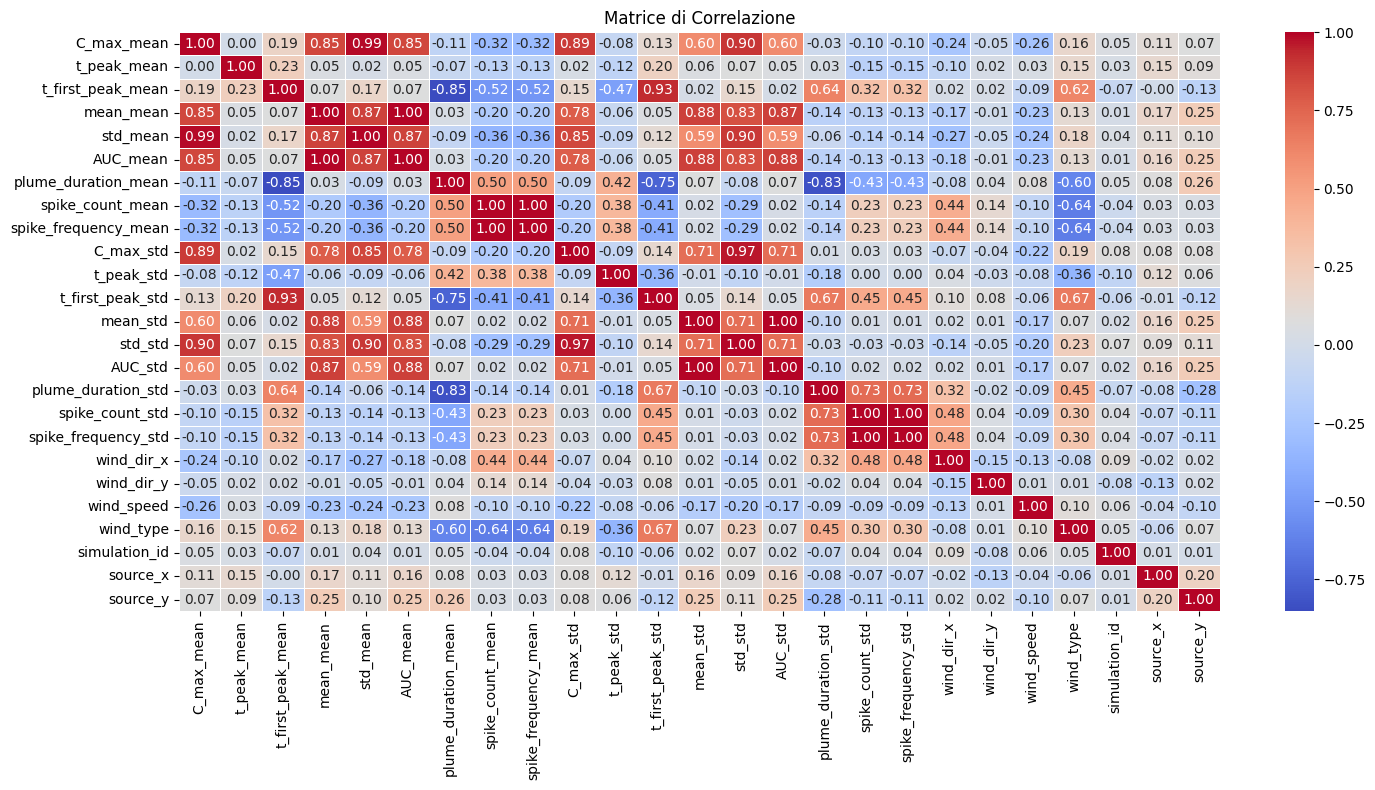

In [207]:
matrix_corr=sim_feature.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title("Matrice di Correlazione")
plt.tight_layout()
plt.show()

In [208]:
from sklearn.preprocessing import StandardScaler

# Rimuovi colonne costanti
features_df = sim_feature.loc[:, sim_feature.nunique() > 1]

# Sostituisci NaN
features_df = features_df.fillna(0)

# Rimuovi feature altamente correlate (>0.95)
corr = features_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
drop_cols = [col for col in upper.columns if any(upper[col] > 0.95)]
features_df.drop(columns=drop_cols, inplace=True)

from sklearn.preprocessing import StandardScaler

cols_to_exclude = ['simulation_id', 'source_x', 'source_y']
cols_to_scale = [c for c in features_df.columns if c not in cols_to_exclude]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(features_df[cols_to_scale])

X_scaled = pd.DataFrame(scaled_values, columns=cols_to_scale)
X_scaled[cols_to_exclude] = features_df[cols_to_exclude].values

X_scaled = X_scaled[features_df.columns]

print(f"[INFO] Dati finali scalati: {X_scaled.shape}")
print(X_scaled.columns)

[INFO] Dati finali scalati: (100, 19)
Index(['C_max_mean', 't_peak_mean', 't_first_peak_mean', 'mean_mean',
       'plume_duration_mean', 'spike_count_mean', 'C_max_std', 't_peak_std',
       't_first_peak_std', 'mean_std', 'plume_duration_std', 'spike_count_std',
       'wind_dir_x', 'wind_dir_y', 'wind_speed', 'wind_type', 'simulation_id',
       'source_x', 'source_y'],
      dtype='object')


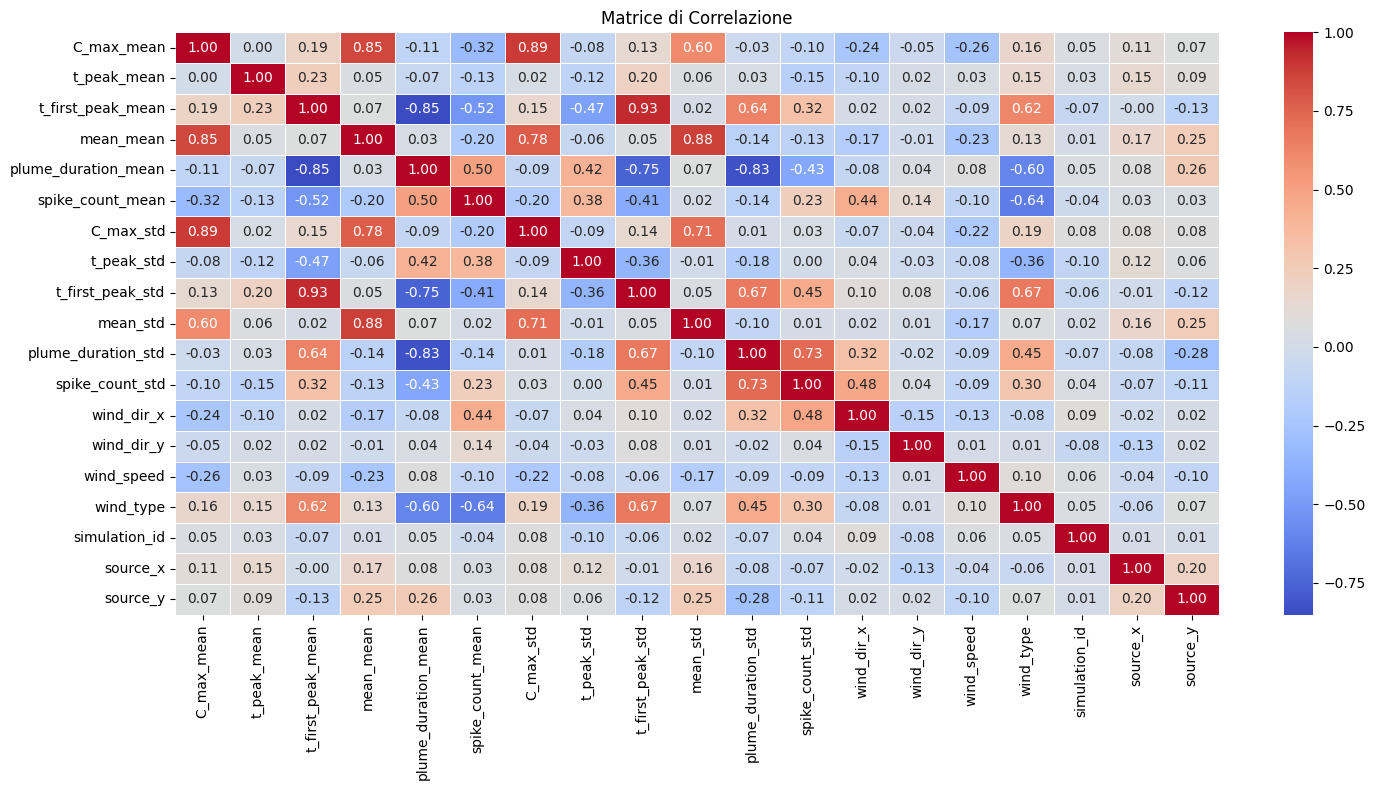

In [209]:
matrix_corr=X_scaled.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title("Matrice di Correlazione")
plt.tight_layout()
plt.show()

In [210]:
X_scaled.head()

,C_max_mean,t_peak_mean,t_first_peak_mean,mean_mean,plume_duration_mean,spike_count_mean,C_max_std,t_peak_std,t_first_peak_std,mean_std,plume_duration_std,spike_count_std,wind_dir_x,wind_dir_y,wind_speed,wind_type,simulation_id,source_x,source_y
0,0.013268,-0.206399,0.783381,-0.388398,-0.930761,-1.427954,0.039648,-0.496247,0.381117,-0.392479,0.120486,-0.918629,-0.129230,-1.500859,-1.005404,-0.039767,0.0,23.0,213.0
1,-0.362587,0.581291,-0.548963,-0.523901,0.806736,0.349666,-0.306285,0.984271,-0.667990,-0.441145,-0.789246,-0.651469,-2.418008,0.530909,0.443639,-0.039767,1.0,330.0,151.0
2,-0.326107,1.587327,-0.541951,-0.354915,0.793633,-0.202054,-0.273122,0.447345,-0.537441,-0.288871,-0.774229,-0.576573,-1.878049,1.472046,0.710263,-0.039767,2.0,158.0,156.0
3,-0.378663,-0.385195,-0.717259,-0.571987,0.149279,1.240452,-0.336030,0.387005,-0.712338,-0.473775,1.100661,1.003291,0.731946,0.084961,0.907333,-1.365347,3.0,79.0,71.0
4,1.557590,1.835334,1.312422,0.998142,-0.820693,-1.397230,2.151222,-0.309691,0.511920,0.717569,0.245870,-1.154407,0.031609,-1.393468,-1.538652,-0.039767,4.0,458.0,494.0


In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Funzione RMSE medio sulle due coordinate
def rmse_multioutput(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_multioutput, greater_is_better=False)

# Target: X e Y della sorgente
Y = X_scaled[["source_x", "source_y"]]


In [219]:
# Modello multivariato
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_x_scores = []
rmse_y_scores = []

# Liste per accumulare tutte le predizioni
all_y_test_x, all_y_pred_x = [], []
all_y_test_y, all_y_pred_y = [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), start=1):
    X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # RMSE fold
    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    #rmse_scores.append(rmse)

    rmse_x = np.sqrt(mean_squared_error(y_test['source_x'], y_pred[:,0]))
    rmse_y = np.sqrt(mean_squared_error(y_test['source_y'], y_pred[:,1]))
    rmse_x_scores.append(rmse_x)
    rmse_y_scores.append(rmse_y)

    all_y_test_x.extend(y_test['source_x'])
    all_y_pred_x.extend(y_pred[:,0])
    all_y_test_y.extend(y_test['source_y'])
    all_y_pred_y.extend(y_pred[:,1])
    
    print(f"\n[Fold {fold}] RMSE_x: {rmse_x:.3f} RMSE_y: {rmse_y:.3f}")
    print("Predizioni (x, y) vs. Reale:")
    for pred, real in zip(y_pred[:], y_test.values[:]): 
        print(f"Pred: [{pred[0]:.3f}, {pred[1]:.3f}] | Reale: [{real[0]}, {real[1]}]")

# Risultato finale
print(f"\nRMSE_x medio CV: {np.mean(rmse_x_scores):.3f} ± {np.std(rmse_x_scores):.3f}")
print(f"\nRMSE_y medio CV: {np.mean(rmse_y_scores):.3f} ± {np.std(rmse_y_scores):.3f}")



[Fold 1] RMSE_x: 8.398 RMSE_y: 10.346
Predizioni (x, y) vs. Reale:
Pred: [20.385, 209.985] | Reale: [23.0, 213.0]
Pred: [458.100, 464.880] | Reale: [458.0, 494.0]
Pred: [413.600, 184.635] | Reale: [409.0, 176.0]
Pred: [399.035, 430.160] | Reale: [386.0, 421.0]
Pred: [70.420, 50.060] | Reale: [70.0, 49.0]
Pred: [279.110, 264.345] | Reale: [275.0, 272.0]
Pred: [401.285, 460.285] | Reale: [385.0, 488.0]
Pred: [358.950, 251.640] | Reale: [376.0, 251.0]
Pred: [443.640, 438.700] | Reale: [448.0, 438.0]
Pred: [74.565, 111.930] | Reale: [67.0, 115.0]
Pred: [121.300, 19.775] | Reale: [125.0, 22.0]
Pred: [146.995, 397.415] | Reale: [138.0, 389.0]
Pred: [207.575, 78.625] | Reale: [215.0, 85.0]
Pred: [168.055, 198.975] | Reale: [171.0, 209.0]
Pred: [471.460, 182.075] | Reale: [470.0, 187.0]
Pred: [20.230, 19.280] | Reale: [5.0, 19.0]
Pred: [81.235, 397.410] | Reale: [91.0, 395.0]
Pred: [209.525, 250.860] | Reale: [217.0, 249.0]
Pred: [443.585, 260.620] | Reale: [448.0, 266.0]
Pred: [409.235, 42.2

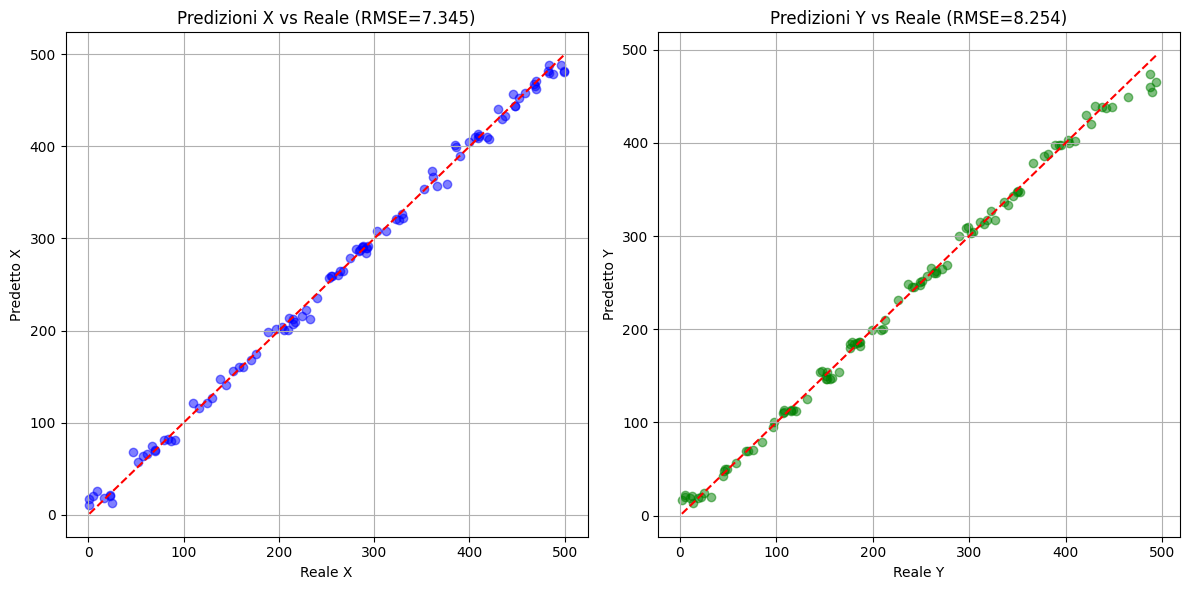

In [221]:
import matplotlib.pyplot as plt

# Scatter plot complessivo
plt.figure(figsize=(12,6))

# X
plt.subplot(1,2,1)
plt.scatter(all_y_test_x, all_y_pred_x, alpha=0.5, color='blue')
plt.plot([min(all_y_test_x), max(all_y_test_x)], [min(all_y_test_x), max(all_y_test_x)], 'r--')
plt.xlabel("Reale X")
plt.ylabel("Predetto X")
plt.title(f"Predizioni X vs Reale (RMSE={np.mean(rmse_x_scores):.3f})")
plt.grid(True)

# Y
plt.subplot(1,2,2)
plt.scatter(all_y_test_y, all_y_pred_y, alpha=0.5, color='green')
plt.plot([min(all_y_test_y), max(all_y_test_y)], [min(all_y_test_y), max(all_y_test_y)], 'r--')
plt.xlabel("Reale Y")
plt.ylabel("Predetto Y")
plt.title(f"Predizioni Y vs Reale (RMSE={np.mean(rmse_y_scores):.3f})")
plt.grid(True)

plt.tight_layout()
plt.show()